In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("CompleteDataset.csv")
df.head()

/Users/dominicdenotter/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df1 = df[['Name','Nationality', 'Overall', "Potential",'Finishing','Agility','Heading accuracy','Positioning', 'Preferred Positions']]
df1.head()

,Name,Nationality,Overall,Potential,Finishing,Agility,Heading accuracy,Positioning,Preferred Positions
0,Cristiano Ronaldo,Portugal,94,94,94,89,88,95,ST LW
1,L. Messi,Argentina,93,93,95,90,71,93,RW
2,Neymar,Brazil,92,94,89,96,62,90,LW
3,L. Suárez,Uruguay,92,92,94,86,77,92,ST
4,M. Neuer,Germany,92,92,13,52,25,12,GK


De naam van de spelers is vooral om het dataframe duidelijk te houden voor mijzelf. Overall en nationality is denk ik nuttig om te zien omdat de hoogste overalls vooral aanvallers zijn met hier en daar een keeper en verdediger wat dus een speler met een hoger overall waarschijnlijk een aanvaller maakt (dit is ook met potential,wage en value), hetzelfde geld voor landen bijvoorbeeld de beste brazilianen en agentijnen zijn meestal een aanvaller. de posties rb,rcb etc.laat ik weg omdat dit niet de favoriete posities van spelers zijn. Daarnaast zijn er een aantal stats die gewoon hoger bij een verdediger zijn dan bij bijvoorbeeld een aanvaller (deze zijn Finishing, Aglity, heading en Positioning).

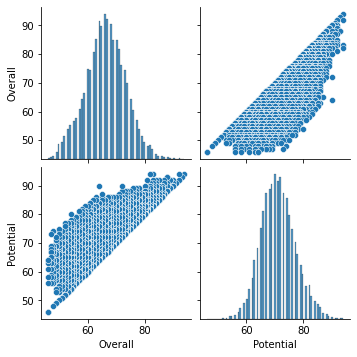

In [24]:
sns.pairplot(df1)

om een of andere reden is het alleen maar mogelijk om alleen potential en overall zichtbaar te maken???

In [25]:
X = df1.loc[:,'Overall':'Positioning']
y = df['Preferred Positions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Value en wage geven een error vandaar dat ik hem een paar stappen terug verwijder.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

ValueError: could not convert string to float: '53-4'

In [29]:
rf.score(X_test,y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.